In [22]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [23]:
!ls /Data2/SubX/NASA

GEOS  GEOS_V2p1


In [24]:
listOfFiles = os.listdir('/Data2/SubX/')
listOfFiles

['ESRL', 'NASA', 'EMC', 'RSMAS', 'ECCC', 'NRL', 'CESM', 'NCEP', 'CWB']

In [25]:
url1 = 'https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.'
# varying_url = 'ESRL/.FIMr1p1/'
# url2 = '.hindcast/.pr/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/S/(Dec)/(Feb)/RANGEEDGES/%5BX/Y%5Daverage/dods'
url2 = '/.hindcast/.'
var_name = ['pr', 'tas', 'tdps', 'wap', 'cape']
url_L = '/L/(0)/(8)/RANGEEDGES'
# url3 = '/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/%5BX/Y%5Daverage/dods'  
url3 = '/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods'  

varying_url = ['ESRL/.FIMr1p1',
               'CESM/.30LCESM1', 'CESM/.46LCESM1',
               'ECCC/.GEM','ECCC/.GEPS5','ECCC/.GEPS6',
               'EMC/.GEFS',
               'GMAO/.GEOS_V2p1',
               'NRL/.NESM',
               'RSMAS/.CCSM4',
               'NCEP/.CFSv2']
               



In [26]:
for i_v_u in varying_url[0:7]:
    print(i_v_u)
    dsl=[]
    for i_v_n in var_name:
        try:
            print(url1+i_v_u+url2+i_v_n+url_L+url3)
            dsl.append(xr.open_dataset(url1+i_v_u+url2+i_v_n+url_L+url3))
        except:
            print('missing '+i_v_n)
    ds = xr.merge(dsl)
    print(ds)

ESRL/.FIMr1p1
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.pr/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.tas/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.tdps/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.wap/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.cape/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
missing cape
<xarray.Dataset>
Dimensions:  (L: 8, M: 4, P: 1, S: 965, X: 91, Y: 38)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  *

https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.tas/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.tdps/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.wap/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.cape/L/(0)/(8)/RANGEEDGES/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/dods
<xarray.Dataset>
Dimensions:  (L: 8, M: 11, P: 1, S: 939, X: 91, Y: 38)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) timedelta64[ns] 0 days 12:00:00 ... 7 days 12:00:00
  * Y        (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 56.0 57.0 58

In [27]:
ds =  ds.chunk({'S':100, 'X':45})


In [28]:
ds

<xarray.Dataset>
Dimensions:  (L: 8, M: 11, P: 1, S: 939, X: 91, Y: 38)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) timedelta64[ns] 0 days 12:00:00 ... 7 days 12:00:00
  * Y        (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 56.0 57.0 58.0 59.0 60.0
  * X        (X) float32 -140.0 -139.0 -138.0 -137.0 ... -53.0 -52.0 -51.0 -50.0
  * P        (P) int32 500
Data variables:
    pr       (S, M, L, Y, X) float32 dask.array<chunksize=(100, 11, 8, 38, 45), meta=np.ndarray>
    tas      (S, M, L, Y, X) float32 dask.array<chunksize=(100, 11, 8, 38, 45), meta=np.ndarray>
    tdps     (S, M, L, Y, X) float32 dask.array<chunksize=(100, 11, 8, 38, 45), meta=np.ndarray>
    wap      (P, S, M, L, Y, X) float32 dask.array<chunksize=(1, 100, 11, 8, 38, 45), meta=np.ndarray>
    cape     (S, M, L, Y, X) float32 dask.array<chunksize=(100, 11, 8, 38, 45), meta=np.ndarray>

In [ ]:
ds_to_save = dsl.isel(P=0, drop=True).chunk({'S': 12})
ds_to_save

AttributeError: 'list' object has no attribute 'isel'

In [ ]:
ds_to_save.pr.data

In [ ]:
ds_to_save.to_zarr('EMC_GEFS.zarr')

In [ ]:
%%time
with dask.config.set(scheduler='single-threaded'):
    dsl = ds.compute()

In [12]:
!rm EMC_GEFS.nc

In [11]:
dsl.to_netcdf('EMC_GEFS.nc')

KeyboardInterrupt: 

In [9]:
import dask

In [20]:
# from dask.distributed import Client, LocalCluster

# cluster = LocalCluster()
# client = Client(cluster)
# cluster

In [21]:
# ds.load()

# Transform units of precip

In [10]:
ds['pr'] = ds.pr*86400

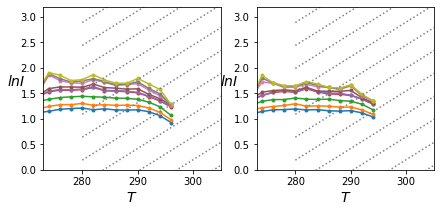

In [41]:
# PLOT USED in proposal

plt.figure(figsize=(7,3))
ax1 = plt.subplot(121)
plt.plot(ds_group.tasb,np.log(ds_group.pr_q_tas),'.-')
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q_tas/8),'-', color='grey')

ax2 = plt.subplot(122)
plt.plot(ds_groupM.tasb,np.log(ds_groupM.pr_q_tas),'.-')
# plt.plot(ds_group2M.tasb,np.log(ds_group2M.pr_q_tas/8),'-', color='grey')
for ax in [ax1, ax2]:
    for iim in np.arange(-31,-13,0.45):
        ax.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    ax.set_ylim((0,3.2))
    ax.set_xlim((273,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$T$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

In [74]:
# t_bins = np.arange(270,ds.tas.max(),0.5)
# tdps_bins = np.arange(270,ds.tdps.max(),0.5)
# cape_bins = np.logspace(np.log(10),np.log(ds.cape.max()*1.1),0.5)
# wap_bins = np.logspace(np.log(1),np.log(ds.wap.max()*1.1),0.5)

# t_center = 0.5*(t_bins[:-1] + t_bins[1:])
# tdps_center = 0.5*(tdps_bins[:-1] + tdps_bins[1:])
# cape_center = 0.5*(cape_bins[:-1] + cape_bins[1:])
# wap_center = 0.5*(wap_bins[:-1] + wap_bins[1:])

# def wrapped_hist2d(a, b):
#     h2d, _, _ = np.histogram2d(a.ravel(), b.ravel(),
#                            bins=[pr_bins, t_bins])
#     return h2d[None, :, :]

In [11]:
import dask.array as dsa

In [12]:
from xhistogram.xarray import histogram


In [28]:
ds_chunked =  ds.chunk({'S':100, 'X':20, 'Y':20})


In [39]:
ds.pr.data

dask.array<rechunk-merge, shape=(939, 11, 8, 38, 91), dtype=float64, chunksize=(100, 11, 8, 20, 20), chunktype=numpy.ndarray>

In [16]:
def wrapped_hist2d(a, b, a_bins, b_bins):
    h2d, _, _ = np.histogram2d(a.ravel(), b.ravel(),
                           bins=[a_bins, b_bins])
    return h2d[None, :, :]




In [40]:
from matplotlib.colors import LogNorm

pr_bins = np.logspace(0, np.log(ds.pr.max()*1.1), 200)
pr_center = 0.5*(pr_bins[:-1] + pr_bins[1:])

hist_dsl = []
for i_v_n in var_name[1:]:
    if (i_v_n[0]=='c'):
        b_var_bin = np.logspace(np.log10(1),np.log10(ds[i_v_n].max()*1.01),100)
    elif (i_v_n[0]=='w'):
        b_var_bin = np.arange(-0.04,0.04,0.001)
        
    else: # for t and td
        b_var_bin = np.arange(270,ds[i_v_n].max()*1.01,1)

    b_var_center = 0.5*(b_var_bin[:-1] + b_var_bin[1:])
    
    # USE XHISTOGRAM
    hTS = histogram(ds.pr, ds[i_v_n], bins=[pr_bins, b_var_bin], density=True)
    ##################
    
#     # USE H2D wrapped    
#     h2d_full = dsa.map_blocks(wrapped_hist2d, ds.pr.data, ds[i_v_n].data,
#                           dtype='i8',
#                           chunks=(1, len(pr_center), len(b_var_center)))
    
#     hTS = xr.DataArray(h2d_full.sum(axis=0).compute(),
#                    dims=['pr_bin', i_v_n+'_bin'],
#                    coords={'pr_bin': pr_center,
#                            i_v_n+'_bin': b_var_center})
#     hTS.coords['pr_bin'].attrs.update(ds.pr.attrs)
#     hTS.coords[i_v_n+'_bin'].attrs.update(ds[i_v_n].attrs)
#     ##################
    
    hist_dsl.append(hTS)
    where_valid = hTS.where(hTS>0).count(dim='pr_bin')>25

    hTS = hTS / hTS.sum(dim='pr_bin')
    h2d_cum = hTS.cumsum(dim='pr_bin')

    fig, ax = plt.subplots()
    cs = h2d_cum.where(h2d_cum[i_v_n+'_bin'][where_valid>0]).plot.contour(ax = ax , levels=np.array(q)/100.)
    ax.set_yscale('log', basey=np.e)
    reformatta = ax.get_yticks()
    ax.set_yticks(reformatta)
    ax.set_yticklabels(np.log(reformatta))
    ax.clabel(cs)
    plt.tight_layout()
    if i_v_n[0]=='c':
        coeff_s = 0.5
    elif i_v_n[0]=='w':
        coeff_s = 1
    else:
        coeff_s = 0.068


#     for scale in np.arange(-16, -10, 0.3):
#         pr_cc = np.exp(coeff_s*b_var_bin)*10**scale
#         ax.plot(b_var_bin, pr_cc, color='m', linestyle='--', linewidth=1)


    ax.set_xlim(b_var_bin[0],b_var_bin[-1])
    ax.set_ylim(pr_bins[0], pr_bins[-1]);
#     ax.plot(ds_group.tasb,(ds_group.pr_q_tas),'.-',zorder=10)

hist_ds = xr.merge(hist_dsl)    
hist_ds.attrs['model_submodel'] = i_v_u

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ('xarray-pr-44aafec2d345c8257ca5316fd39566ac', <Worker 'tcp://127.0.0.1:37977', memory: 0, processing: 1>)

In [44]:
ds.pr.data

dask.array<rechunk-merge, shape=(939, 11, 8, 38, 91), dtype=float64, chunksize=(100, 11, 8, 20, 20), chunktype=numpy.ndarray>

In [42]:
hTS = histogram(ds.pr, ds[i_v_n], bins=[pr_bins, b_var_bin])
hTS

<xarray.DataArray 'histogram_pr_tas' (pr_bin: 199, tas_bin: 50)>
dask.array<getitem, shape=(199, 50), dtype=int64, chunksize=(199, 50), chunktype=numpy.ndarray>
Coordinates:
  * pr_bin   (pr_bin) float64 1.041 1.126 1.218 ... 5.397e+06 5.837e+06
  * tas_bin  (tas_bin) float64 270.5 271.5 272.5 273.5 ... 317.5 318.5 319.5

In [41]:
client

Client Scheduler: tcp://127.0.0.1:40947 Dashboard: http://127.0.0.1:43566/status,Cluster Workers: 8 Cores: 32 Memory: 33.13 GB


In [189]:
from matplotlib.colors import LogNorm

pr_bins = np.logspace(0, np.log(ds.pr.max()*1.1), 200)
pr_center = 0.5*(pr_bins[:-1] + pr_bins[1:])

hist_dsl = []
for i_v_n in var_name[1:]:
    if (i_v_n[0]=='c'):
        b_var_bin = np.logspace(np.log10(1),np.log10(ds[i_v_n].max()*1.01),100)
    elif (i_v_n[0]=='w'):
        b_var_bin = np.arange(-0.04,0.04,0.001)
        
    else: # for t and td
        b_var_bin = np.arange(270,ds[i_v_n].max()*1.01,1)

    b_var_center = 0.5*(b_var_bin[:-1] + b_var_bin[1:])
    
    hTS = histogram(ds.pr, ds[i_v_n], bins=[pr_bins, b_var_bin], density=True)
    hist_dsl.append(hTS)
    where_valid = hTS.where(hTS>0).count(dim='pr_bin')>25

    hTS = hTS / hTS.sum(dim='pr_bin')
    h2d_cum = hTS.cumsum(dim='pr_bin')

    fig, ax = plt.subplots()
    cs = h2d_cum.where(h2d_cum[i_v_n+'_bin'][where_valid>0]).plot.contour(ax = ax , levels=np.array(q)/100.)
    ax.set_yscale('log', basey=np.e)
    reformatta = ax.get_yticks()
    ax.set_yticks(reformatta)
    ax.set_yticklabels(np.log(reformatta))
    ax.clabel(cs)
    plt.tight_layout()
    if i_v_n[0]=='c':
        coeff_s = 0.5
    elif i_v_n[0]=='w':
        coeff_s = 1
    else:
        coeff_s = 0.068


#     for scale in np.arange(-16, -10, 0.3):
#         pr_cc = np.exp(coeff_s*b_var_bin)*10**scale
#         ax.plot(b_var_bin, pr_cc, color='m', linestyle='--', linewidth=1)


    ax.set_xlim(b_var_bin[0],b_var_bin[-1])
    ax.set_ylim(pr_bins[0], pr_bins[-1]);
#     ax.plot(ds_group.tasb,(ds_group.pr_q_tas),'.-',zorder=10)

hist_ds = xr.merge(hist_dsl)    
hist_ds.attrs['model_submodel'] = i_v_u

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ('xarray-pr-44aafec2d345c8257ca5316fd39566ac', <Worker 'tcp://127.0.0.1:39538', memory: 0, processing: 1>)

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


In [161]:
hist_ds

<xarray.Dataset>
Dimensions:            (cape_bin: 99, pr_bin: 199, tas_bin: 28, tdps_bin: 21, wap_bin: 79)
Coordinates:
  * pr_bin             (pr_bin) float64 1.012 1.036 1.06 ... 99.18 101.5 103.9
  * tas_bin            (tas_bin) float64 270.5 271.5 272.5 ... 295.5 296.5 297.5
  * tdps_bin           (tdps_bin) float64 270.5 271.5 272.5 ... 289.5 290.5
  * wap_bin            (wap_bin) float64 -0.0395 -0.0385 ... 0.0375 0.0385
  * cape_bin           (cape_bin) float64 1.034 1.103 1.177 ... 563.5 601.4
Data variables:
    histogram_pr_tas   (pr_bin, tas_bin) int64 0 0 0 0 0 1 0 0 ... 0 0 0 0 0 0 0
    histogram_pr_tdps  (pr_bin, tdps_bin) int64 0 0 0 0 1 0 0 ... 0 0 0 0 0 0 0
    histogram_pr_wap   (pr_bin, wap_bin) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    histogram_pr_cape  (pr_bin, cape_bin) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    model_submodel:  EMC/.GEFS

In [132]:
hTS = hTS / hTS.sum(dim='pr_bin')


<xarray.DataArray 'histogram_pr_cape' (pr_bin: 199, cape_bin: 99)>
array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]])
Coordinates:
  * pr_bin    (pr_bin) float64 1.012 1.036 1.06 1.085 ... 99.18 101.5 103.9
  * cape_bin  (cape_bin) float64 1.034 1.103 1.177 1.256 ... 528.1 563.5 601.4

In [151]:
h2d_cum

<xarray.DataArray 'histogram_pr_cape' (pr_bin: 199, cape_bin: 99)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])
Coordinates:
  * pr_bin    (pr_bin) float64 1.012 1.036 1.06 1.085 ... 99.18 101.5 103.9
  * cape_bin  (cape_bin) float64 1.034 1.103 1.177 1.256 ... 528.1 563.5 601.4

In [122]:
b_var_bin

array([  1.        ,   1.06803803,   1.14070523,   1.21831657,
         1.30120843,   1.38974009,   1.48429527,   1.58528379,
         1.69314338,   1.80834152,   1.93137751,   2.06278464,
         2.20313244,   2.35302923,   2.5131247 ,   2.68411276,
         2.8667345 ,   3.06178147,   3.27009905,   3.49259015,
         3.7302191 ,   3.98401586,   4.25508045,   4.54458774,
         4.85379254,   5.18403503,   5.53674656,   5.91345589,
         6.31579578,   6.74551008,   7.2044613 ,   7.69463865,
         8.21816671,   8.77731458,   9.37450577,  10.01232868,
        10.6935478 ,  11.42111573,  12.19818594,  13.02812649,
        13.91453455,  14.86125207,  15.87238238,  16.95230801,
        18.10570966,  19.33758648,  20.65327777,  22.0584861 ,
        23.55930204,  25.16223055,  26.87421915,  28.70268808,
        30.65556243,  32.74130651,  34.96896051,  37.3481797 ,
        39.88927627,  42.60326405,  45.50190621,  48.59776628,
        51.90426257,  55.43572634,  59.20746396,  63.23

In [93]:
h2d_full.compute().shape

/local/ERAin/lib/python3.6/site-packages/distributed/worker.py:3269: UserWarning: Large object of size 1.32 MB detected in task graph: 
  (array([[[2.14632731, 1.7456246 , 2.68542504, ..., ... 4.71633582]]]))
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


(1, 199, 51)

/local/ERAin/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


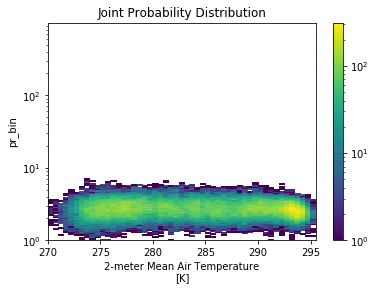

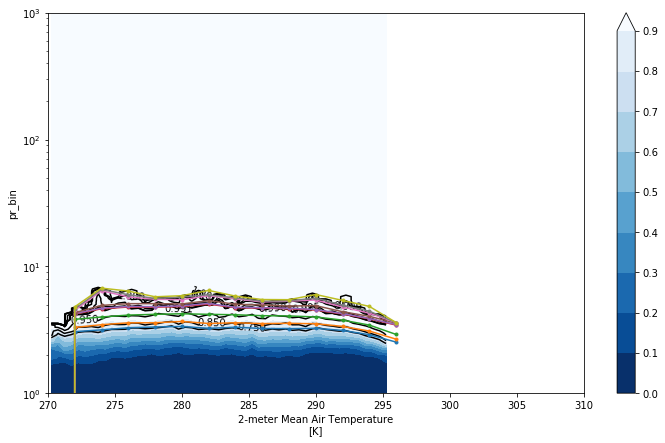

In [68]:
h2d_normed = h2d / h2d.sum(dim='pr_bin')
h2d_cum = h2d_normed.cumsum(dim='pr_bin')

fig, ax = plt.subplots(figsize=(12, 7))
h2d_cum.plot.contourf(yscale='log', levels=np.arange(0,1,0.1), cmap='Blues_r')
cs = h2d_cum.plot.contour(yscale='log', levels=np.array(q)/100., colors='k')
ax.clabel(cs)

for scale in np.arange(-16, -10, 0.3):
    pr_cc = np.exp(0.068*t_bins)*10**scale
    plt.plot(t_bins, pr_cc, color='m', linestyle='--', linewidth=1)


ax.set_xlim(270, 310)
ax.set_ylim(pr_bins[0], pr_bins[-1]);
ax.plot(ds_group.tasb,(ds_group.pr_q_tas),'.-',zorder=10)


In [62]:
np.array(q)/100.

array([0.75  , 0.85  , 0.95  , 0.99  , 0.991 , 0.995 , 0.999 , 0.9995,
       0.9999])

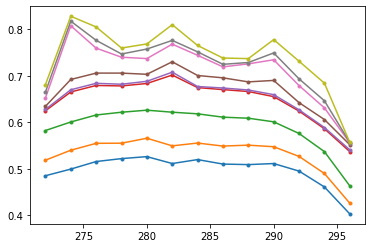

In [57]:
plt.plot(ds_group.tasb,np.log10(ds_group.pr_q_tas),'.-',zorder=10)